# Lista 3


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [73]:
random_state = 222

## zad 1

Implementuję regresję liniową z jedną zmienną za pomocą metody **najmniejszych kwadratów (OLS)**, bez korzystania z bibliotek typu `scikit-learn`, ale korzystając z wykładu. Moim celem jest:

- wygenerowanie danych syntetycznych,
- obliczenie współczynników $\hat{\beta}$ zgodnie z wzorem OLS:

$$
\hat{\beta} = (X^T X)^{-1} X^T y
$$

Rozpoczynam od generowania. Model, według którego generuję dane, to:

$$
y = \beta_1 x + \beta_0
$$

Gdzie:

- $\beta_1 = 3.5$, rzeczywisty współczynnik kierunkowy,
- $\beta_0 = 1.2$, rzeczywisty wyraz wolny (intercept).

Dane są idealnie liniowe, bez składnika losowego $\varepsilon$.

In [74]:
np.random.seed(random_state)
n = 143
X = 2 * np.random.rand(n)

beta_1 = 3.5
beta_0 = 3

y = beta_1 * X + beta_0

Algorytm OLS

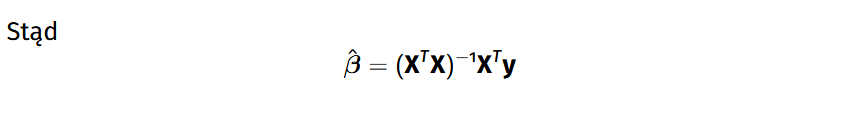

ważny element:

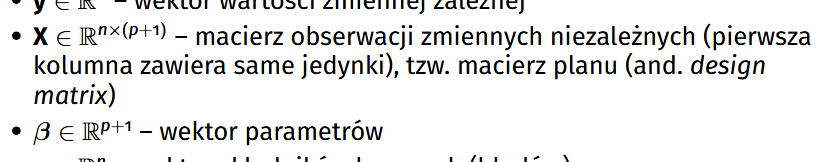

In [75]:
ones_column = np.ones((n, 1))
Xmatrix = np.hstack((ones_column, X.reshape(-1, 1)))

# Obliczamy (X^T X)
XtX = Xmatrix.T @ Xmatrix

# Obliczamy (X^T y)
Xty = Xmatrix.T @ y

beta_hat = np.linalg.inv(XtX) @ Xty
beta_hat

array([3. , 3.5])

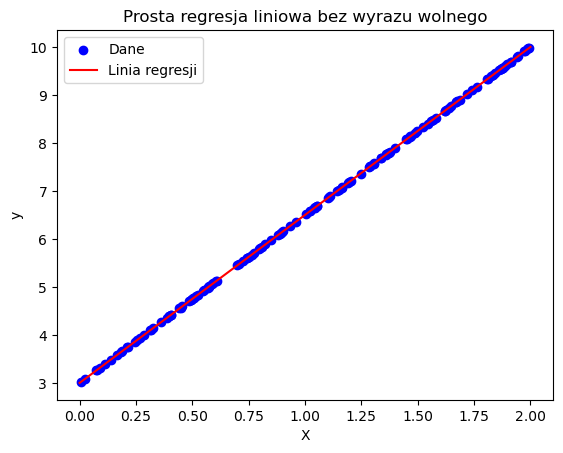

In [76]:
X_line = np.linspace(0, 2, 100).reshape(-1,1)
y_line = beta_hat[1] * X_line + beta_hat[0]

plt.scatter(X, y, color='blue', label='Dane')
plt.plot(X_line, beta_hat[1] * X_line + beta_hat[0], color='red', label='Linia regresji')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Prosta regresja liniowa bez wyrazu wolnego')
plt.legend()
plt.show()